In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(19740, 21)

In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19740.000000,1.539600e+04,19732.000000,19732.000000,15327.000000,15327.000000,15327.000000,14944.000000,8617.000000,9351.000000,15448.000000,15448.000000,19732.000000
mean,2.947163,1.054957e+06,9.861509,3106.533904,2.900568,1.548509,1.578065,583.917090,196.806973,1874.165655,-37.811892,144.996632,7509.802706
std,0.981048,6.452557e+05,5.554233,88.429928,1.007491,0.713385,0.972221,3785.423175,561.558007,393.354888,0.072708,0.096178,4419.678648
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431620,249.000000
25%,2.000000,6.300000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1930.000000,-37.856860,144.939323,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,420.000000,132.000000,1965.000000,-37.808965,145.000900,6567.000000
75%,4.000000,1.301000e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,663.000000,199.000000,1997.000000,-37.761897,145.054710,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,40468.000000,2106.000000,-37.413810,145.526350,21650.000000


In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
BuildingArea     11123
YearBuilt        10389
CouncilArea       4444
Lattitude         4292
Longtitude        4292
Regionname           8
Propertycount        8
dtype: int64

In [7]:
df = df.dropna(subset=['Price'])

In [8]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            7
Postcode            7
Bedroom2         3422
Bathroom         3422
Car              3422
Landsize         3722
BuildingArea     8751
YearBuilt        8174
CouncilArea      3444
Lattitude        3329
Longtitude       3329
Regionname          7
Propertycount       7
dtype: int64

In [9]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

Text(0.5, 1.0, 'Distribution of Price')

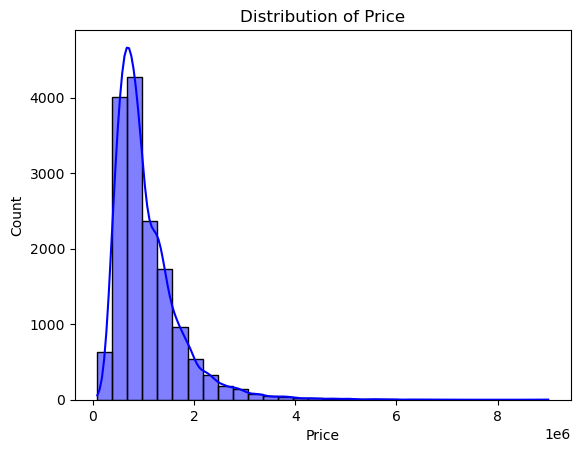

In [13]:
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title("Distribution of Price")

Text(0.5, 1.0, 'Correalation heatmap')

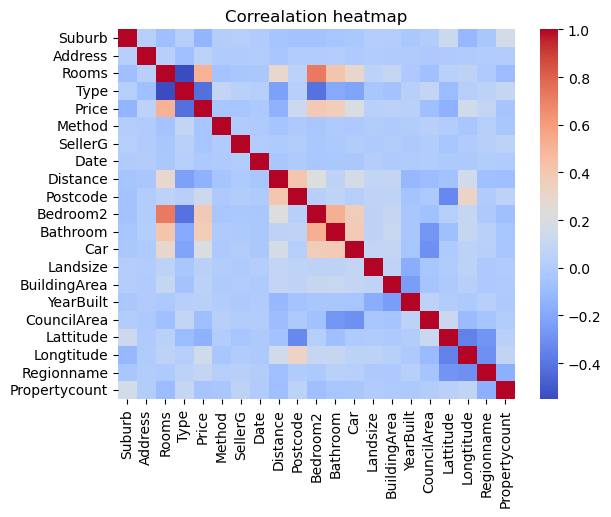

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correalation heatmap')

Text(0.5, 1.0, 'Price vs Rooms')

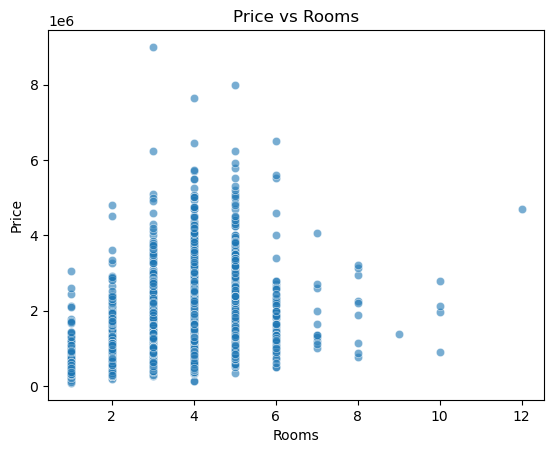

In [15]:
sns.scatterplot(x=df['Rooms'], y = df['Price'], alpha=0.6)
plt.title('Price vs Rooms')

Text(0.5, 1.0, 'Price vs Distance')

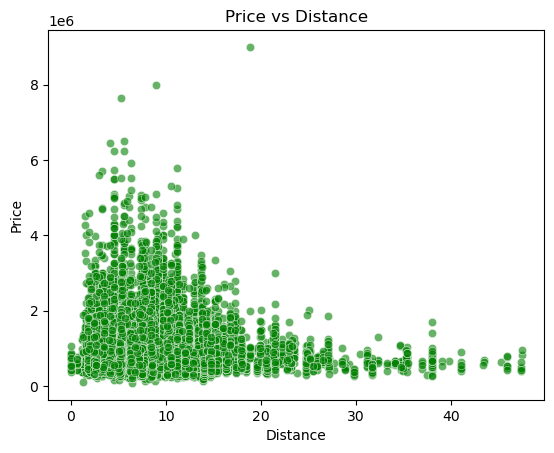

In [16]:
sns.scatterplot(x=df['Distance'], y = df['Price'], alpha=0.6, color='green')
plt.title('Price vs Distance')

Text(0.5, 1.0, 'Price by Region')

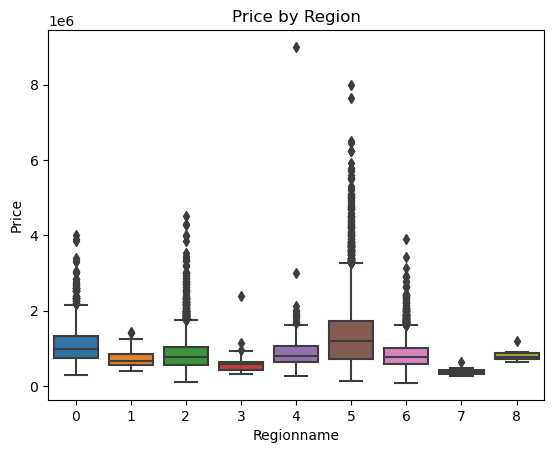

In [17]:
sns.boxplot(x=df['Regionname'], y=df['Price'])
plt.title('Price by Region')

Text(0.5, 1.0, 'Distribution of Landsize')

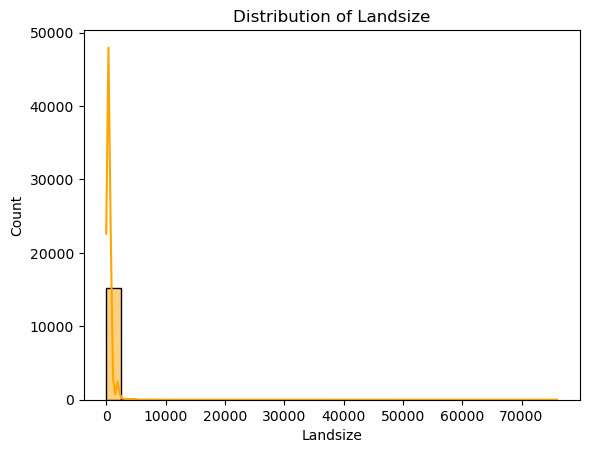

In [18]:
sns.histplot(df['Landsize'], kde=True, bins=30, color='orange')
plt.title('Distribution of Landsize')

In [19]:
X = df.drop(columns=['Price', 'Address'])
y = df['Price']

In [20]:
X.shape

(15396, 19)

In [21]:
y.shape

(15396,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
X_train.shape

(12316, 19)

In [24]:
X_test.shape

(3080, 19)

In [25]:
y_train.shape

(12316,)

In [26]:
y_test.shape

(3080,)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
def model_evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)*100
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Accuracy: {accuracy:.2f}%]\n")

In [30]:
results = []

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
model_evaluation(lr)

Model: LinearRegression
Mean Squared Error: 208198669900.88
Mean Absolute Error: 301586.10
R2 Score: 0.52
Accuracy: 52.29%]



In [34]:
results.append({'Model': "LinearRegression", "Accuracy":52.29})

# Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

In [36]:
model_evaluation(gb)

Model: GradientBoostingRegressor
Mean Squared Error: 124541709911.30
Mean Absolute Error: 214699.67
R2 Score: 0.71
Accuracy: 71.46%]



In [37]:
results.append({"Model":"GradientBoostingRegressor", "Accuracy":71.46})

# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

In [39]:
model_evaluation(rfr)

Model: RandomForestRegressor
Mean Squared Error: 107278856313.30
Mean Absolute Error: 193944.68
R2 Score: 0.75
Accuracy: 75.42%]



In [40]:
results.append({"Model":"RandomForestRegressor", "Accuracy":75.42})

# XGB Regressor

In [41]:
from xgboost import XGBRegressor

In [42]:
xgbr = XGBRegressor(random_state=42)

In [43]:
model_evaluation(xgbr)

Model: XGBRegressor
Mean Squared Error: 98330539191.74
Mean Absolute Error: 189579.91
R2 Score: 0.77
Accuracy: 77.47%]



In [44]:
results.append({"Model":"XGBRegressor", "Accuracy":77.47})

In [45]:
results_df = pd.DataFrame(results)

In [46]:
results_df

,Model,Accuracy
0,LinearRegression,52.29
1,GradientBoostingRegressor,71.46
2,RandomForestRegressor,75.42
3,XGBRegressor,77.47


In [47]:
print("\n Model Performance Summary")
print(results_df.sort_values(by='Accuracy', ascending=False))


 Model Performance Summary
                       Model  Accuracy
3               XGBRegressor     77.47
2      RandomForestRegressor     75.42
1  GradientBoostingRegressor     71.46
0           LinearRegression     52.29
